In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

C:\Users\sp617\anaconda3\envs\py310\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.4 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


## loading model

In [3]:
import os

file_path = 'trained_model.keras'
if os.path.exists(file_path):
    print("File exists")
else:
    print("File does not exist")


File exists


In [4]:
model = tf.keras.models.load_model('trained_model.keras')

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Visualising images of test set

In [6]:
import sys
print(sys.executable)


C:\Users\sp617\anaconda3\envs\py310\python.exe


In [7]:
!pip install opencv-python

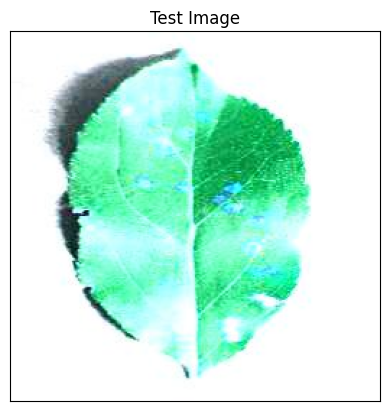

In [8]:
import cv2
image_path = "test/test/AppleCedarRust1.JPG"
#reading image
img= cv2.imread(image_path)

#displaying image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [9]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr =tf.keras.preprocessing.image.img_to_array(image)
input_arr =np.array([input_arr])#convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [10]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 62s 62s/step


(array([[3.2766088e-11, 9.5413244e-10, 9.9999928e-01, 4.2649247e-13,
         3.9499750e-09, 3.8247808e-10, 3.9284033e-13, 1.2108599e-12,
         1.2593718e-15, 5.0513223e-17, 3.1767273e-17, 3.5063206e-08,
         5.3278801e-12, 2.4980372e-12, 1.6447066e-07, 8.5614994e-11,
         5.8330984e-09, 1.7539034e-10, 4.9721849e-09, 7.6460678e-09,
         9.0555683e-15, 5.1343004e-15, 3.9649842e-11, 2.8278083e-12,
         4.4094634e-14, 3.3082871e-13, 5.7696393e-13, 2.4952544e-13,
         1.9626225e-07, 2.0032020e-08, 1.4520402e-08, 2.2064270e-13,
         1.2153592e-10, 6.0082868e-15, 2.8065588e-07, 1.2543803e-08,
         1.5611841e-09, 7.1554207e-11]], dtype=float32),
 (1, 38))

In [11]:
result_index=np.argmax(prediction)
result_index

2

In [12]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

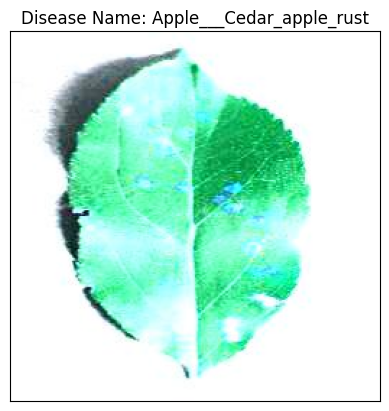

In [13]:
#Displaying Result Of diseas predaction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [14]:
model_prediction

'Apple___Cedar_apple_rust'